###Title: Neural Networks Notes
####Author: Tony Chang
####Abstract: Notes from Michael Nielsen's online book regarding neural networks.
http://neuralnetworksanddeeplearning.com/chap1.html

The first lesson in this book is to understand how one recognizes handwritten digits. It is difficult to explicitly tell a computer that the number '9' is a circle with a tail that sometimes is curved, but sometimes is straight, and sometimes that circle is an oval, etc....So instead of trying do that, we provide a computer a dataset of many examples of '9', and let it learn what it looks like from many examples.

First term to understand is a **Perceptron**. A perceptron is essentially a function that takes in some number of inputs $x$, multiplies them by a weight $w$ and takes the sum (essentially a dot product) and then returns an output provided some logical set of rules and bias $b$ offset on the dot product. 
![perceptron](http://neuralnetworksanddeeplearning.com/images/tikz0.png)

In the simplest case, we can have a perceptron return a 1 or 0 for the given dot product.

$$
\text{output} = \begin{cases} 0, \text{if } w \cdot x + b \le 0 \\1, 
\text{if } w \cdot x + b > 0 \end{cases}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#let's build a perceptron!
def perceptron(x, w, b):
    #input x and w arrays and b bias
    #this perceptron builds a NAND gate
    output = np.dot(x,w) + b
    #logical test
    if output > 0:
        return(1)
    elif output <= 0:
        return(0)

In [4]:
x11 = np.array([1,1])
x01 = np.array([0,1])
x10 = np.array([1,0])
x00 = np.array([0,0])
w = np.ones(2) * -2
b = 3
print(perceptron(x11, w, b))
print(perceptron(x01, w, b))
print(perceptron(x10, w, b))
print(perceptron(x00, w, b))

0
1
1
1


Let's see if we can link perceptrons to get a sum of these inputs
![NAND](http://neuralnetworksanddeeplearning.com/images/tikz4.png)

In [5]:
def NAND(x, w, b):
    out1 = perceptron(x,w,b)
    ox1 = np.array([x[0],out1])
    ox2 = np.array([x[1],out1])
    outx1 = perceptron(ox1,w,b)
    outx2 = perceptron(ox2,w,b)
    oxx = np.array([outx1,outx2])
    sumx = perceptron(oxx, w, b)
    carrybit = perceptron(np.array([out1,out1]), w,b) # this is the 2*1 bit (i.e. 2)
    return(sumx, carrybit)    

In [6]:
w = np.ones(2) * -2
b = 3

for x1 in range(2):
    for x2 in range(2):
        x = np.array([x1,x2])
        nandx = NAND(x,w,b)
        print("The sum of 0%d and 0%d is %d%d."%(x1,x2,nandx[1],nandx[0]))

The sum of 00 and 00 is 00.
The sum of 00 and 01 is 01.
The sum of 01 and 00 is 01.
The sum of 01 and 01 is 10.


This looks great, we a neural network used as a NAND gate for computation. So perceptrons can be used for computation in this example.

Now we need to introduce the **Sigmoid neuron**. In the previous example, the perceptron could only provide binary output 0 or 1. But, if we allow the output to be continuous between 0 and 1, then this would allow us to construct a perceptron that can slightly change the output by slight changes in either the weight $w$ or bias $b$.

We remember from statistics, if we want a function to run from 0 to 1 in a continuous manner, we can just use a logistic function:

$$
\sigma(z) = \frac{1}{1+e^{-z}}.
$$

This is also known as the **sigmoid function** in machine learning or neural networks. But, this is a specific case, it can be any function, also called an _activation function_ $f(\cdot)$.

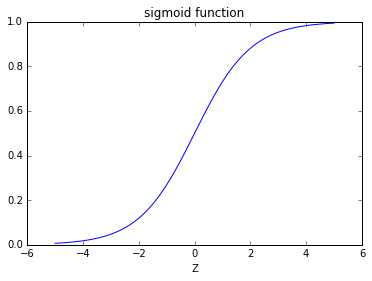

In [7]:
z = np.linspace(-5,5,1000)
def sigmoid(z):
    return(1/(1+np.e**(-z)))
sig = sigmoid(z)
plt.plot(z, sig)
plt.xlabel('Z')
plt.title('sigmoid function')

So we can apply the sigmoid activation function to our perceptron in the form:
$$
\sigma(w \cdot x + b) = \text(output)
$$
Noting that small changes in $w$ and $b$ can create small changes in the output:
$$
\Delta\text{output} \approx \sum_j \frac{\partial\text{output}}{\partial w_j} \Delta w_j + \frac{\partial\text{output}}{\partial b}\Delta b
$$

###Exercise 1: Sigmoid neurons simulating perceptrons, part I - Suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive constant, $c>0$. Show that the behaviour of the network doesn't change.

In [8]:
w = np.ones(2) * -2
b = 3
c = np.random.random(1) * (np.random.random(1)*10)
w = w * c
b = b * c
for x1 in range(2):
    for x2 in range(2):
        x = np.array([x1,x2])
        nandx = NAND(x,w,b)
        print("The sum of 0%d and 0%d is %d%d."%(x1,x2,nandx[1],nandx[0]))
print("c = %f"%c)

The sum of 00 and 00 is 00.
The sum of 00 and 01 is 01.
The sum of 01 and 00 is 01.
The sum of 01 and 01 is 10.
c = 4.301897


The behaviour of the NAND perceptron does not change with constant $c > 0$ multiplying $w$ and $b$

###Exercise 2: Sigmoid neurons simulating perceptrons, part II - Suppose we have the same setup as the last problem - a network of perceptrons. Suppose also that the overall input to the network of perceptrons has been chosen. We won't need the actual input value, we just need the input to have been fixed. Suppose the weights and biases are such that $w⋅x+b≠0$ for the input x to any particular perceptron in the network. Now replace all the perceptrons in the network by sigmoid neurons, and multiply the weights and biases by a positive constant c>0. Show that in the limit as $c→∞$ the behaviour of this network of sigmoid neurons is exactly the same as the network of perceptrons. How can this fail when $w⋅x+b=0$ for one of the perceptrons?

if $c \rightarrow \infty$ then $z \rightarrow -\infty$ so the value sigmoid neuron approaches 0. If $w \cdot x + b =0$ then our sigmoid will equal $\frac{1}{1+1}$ which equals $\frac{1}{2}$. This is not an output of our perceptron?

In [9]:
#let's build a this perceptron!
#in this case w dot x + b can not equal 0, so x is some fixed value. Let's use x = np.array([1,1])
def sigmoid(x, w, b):
    #input x and w arrays and b bias
    #this perceptron builds a NAND gate
    output = 1/(1+ np.e**(-1*(np.dot(x,w) + b)))
    #logical test
    return(output)

[[ 1.   1.5  0.   0.  -0.5]
 [ 1.5  2.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [-0.5  0.   0.   0.  -2. ]]
[[ 28.  27.   0.   0.  31.]
 [ 27.  26.   0.   0.  30.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [ 31.  30.   0.   0.  34.]]
[[ 1.  1.  0.  0.  1.]
 [ 1.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  1.]]


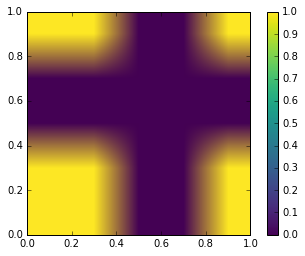

In [10]:
j = 5
w = np.ones(2) *-2
b = 30
o = np.zeros((j,j))
zs = np.zeros((j,j))
xs = np.zeros((j,j))
r = np.linspace(-1,1,j)

for x1 in r:
    for x2 in r:
        x = np.array([x1,x2])
        xs[x1,x2] = np.sum(x)
        zs[x1,x2] = np.dot(x,w) + b
        o[x1,x2]=sigmoid(x,w,b)
print(xs)
print(zs)
print(o)
plt.set_cmap('viridis')
plt.imshow(o, origin = 'lower', extent = [o.min(), o.max(), o.min(), o.max()]); plt.colorbar()

Think about this exercise more....

###Introducing the cost function
So the first cost function introduced is:
$$
C(w,b) \equiv \frac{1}{2n} \sum_x \parallel y(x) - a \parallel^2
$$
Which is just the mean squared error. Where $a$ is a vector of length $n$ (total number of training values) the correct classifications for the numbers (0,9), represented in binary (1 is the class and 0 is not the class), and $y(x)$ is the output from the neural network.

We would like to minimize this cost function. So let's consider what a cost function could look like. Imagining a case for 2 variables $v_1$ and $v_2$ we can visualize a cost function as:
![cost_func](http://neuralnetworksanddeeplearning.com/images/valley.png)

Using this cost function we can find what values of $v$, the variables (or the weights and the bias in our perceptron model), that we should use by taking the gradient of $C$ (the partial derivatives in terms of each input variable) times some negative learning rate $\eta$. We use this value to change our next input weight and bias for the each training data set. It should be noted that this would mean that we adjust the weight and bias with each individual training data input $n$ and take the mean of it which could take a great deal of time. One solution is to take a subset of the data of size $m$ randomly and calculate the gradient of the cost function on those only, this known as *stochastic gradient descent*. 

##Coding the neural network

In [11]:
#define the neural network object
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]

In [12]:
#instantiate a network with 2 neurons in the first layer (two inputs), 3 in the second (3x2 weights, and 3x1 biases), 
#and one in the third (1x3 weights and 1 bias)
net = Network([2, 3, 1])

In [13]:
#we can see this if we inspect weights and bias. They are drawn from a Gaussian distribution as a start
net.weights

[array([[-1.09017549,  0.88532732],
        [-1.42952297,  1.25465337],
        [-0.42706436, -0.22721239]]),
 array([[-1.70633961,  0.45619433, -0.21006705]])]

In [14]:
#define sigmoid function again
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [15]:
#reminder of what "zip" does
a = np.arange(1,5)
b = np.arange(3,8)
for i,j in zip(a,b):
    print(i,j)

1 3
2 4
3 5
4 6


In [16]:
import random
#define the neural network object
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    #now define stochastic gradient descent
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The "training_data" is a list of tuples
        "(x, y)" representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If "test_data" is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: 
            n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data) #shuffle up the training data
            mini_batches = [
                training_data[k:k+mini_batch_size] 
                for k in range(0, n, mini_batch_size)] #make a mini batch of mini_batch_size
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch %i %i / %i"%(j, self.evaluate(test_data), n_test))
            else:
                print("Epoch %i complete"%j)

    #define the update_mini_batch function as well
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases] #creates place holder for the biases
        nabla_w = [np.zeros(w.shape) for w in self.weights] #creates place holder for the weights
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]

    #functions for calculating the cost function and gradient of cost function
    def feedforward(self, a):
        """Return the output of the network if "a" is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return(a)

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [17]:
%load_ext autoreload
%autoreload 2
%run mnist_loader

In [18]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [19]:
#initialize our network for the MNIST data with 15 hidden layers and 10 final layers.
net = Network([784, 15, 10])

Generating a network as pictured:
![network_model](http://neuralnetworksanddeeplearning.com/images/tikz12.png)

In [20]:
#run the stochastic gradient descent 
#with 30 epochs, mini-batch size of 10, and learning rate of 3.0
net.SGD(training_data, 15, 10, 3.0, test_data=test_data) 

Epoch 0 8756 / 10000
Epoch 1 9035 / 10000
Epoch 2 9113 / 10000
Epoch 3 9111 / 10000
Epoch 4 9194 / 10000
Epoch 5 9144 / 10000
Epoch 6 9188 / 10000
Epoch 7 9205 / 10000
Epoch 8 9228 / 10000
Epoch 9 9235 / 10000
Epoch 10 9222 / 10000
Epoch 11 9249 / 10000
Epoch 12 9270 / 10000
Epoch 13 9181 / 10000
Epoch 14 9195 / 10000


After 15 epochs, the accuracy of our neural network is at 93.20%, which is pretty decent. 

We can modify a number of parameters to affect the accuracy of the model including the: number of hidden layers, mini-batch size, and learning rate. A modification of the hidden layers will generate more or less perceptrons to specify weight and bias relationships between the 784 input perceptrons. Again, all these perceptrons in the hidden layer are doing are multiplying the inputs by a weight parameter plus a bias and then transforming them using a sigmoid function. In a way more hidden layers just creates a more complicated model which could lead to overfitting. Likewise, a greater mini-batch creates a more accurate change in the gradient of the cost function (accurate meaning, a more representative sample of the total training dataset) and finally a learning rate change impacts how fast or slow we descend the cost function. 

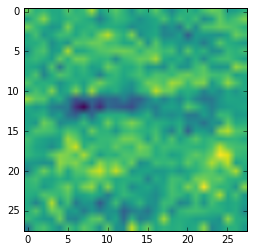

In [21]:
#inspection of the output weights
plt.imshow(np.reshape(net.weights[0][10], (28,28)), cmap = 'viridis')

##Understanding backpropogation
The next section of the book discusses how one would use the code for backpropogation to calculate the gradient of the cost function and then use it to adjust the weights and biases.

First we use the notation $w^l_{jk}$ where $w$ is the weight, $l$ is the layer, $j$ is the neuron in that $l$ layer, and $k$ is the neuron connecting to $j$ from the $l-1$ layer. 

Then each neuron $a$ that we have will transform the inputs as $$a^l_j = \sigma \bigg(\sum_k w^l_{jk}a^{l-1}_k + b^l_j \bigg)$$, that is, the sum of all the sigmoid transforms from each previous neuron times their corresponding weight and plus bias. Where we can shorthand define $$z^l_j = \sum_k w^l_{jk}a^{l-1}_k + b^l_j $$


Given this representation of $a^l_j$ we can consider an $L$ which is the last output layer, to define our cost function as $$\frac{1}{2}||y-a^L||^2 = \frac{1}{2}\sum_j(y_j - a^L_j)^2$$,
where $y$ is a parameter defined by the input $x$.

Now this is defined, we can explore the 4 equations that make backpropogation possible.

###Equation 1: Error in the output layer
$$\delta^L_j = \frac{\partial C}{\partial a^L_j}\sigma' (z^L_j)$$
Which we can think of the change in the cost for a change in the activation output of the $j$ neuron in the last layer $L$. We know that the cost function is quadratic so we can just calculate the derivative analytically:
$$\partial(C) = \partial(\frac{1}{2}\sum_j(y_j-a_j)^2)$$
$$\partial C/\partial a_j^L = (a_j -y_j)$$
This can be rewritten in matrix form as 
$$\delta^L = \nabla_a C \odot \sigma'(z^L)$$

where $\odot$ is the Hadamard product, which is essentially just elementwise product of two vectors:
$$
\begin{eqnarray}
\left[\begin{array}{c} 1 \\ 2 \end{array}\right] 
  \odot \left[\begin{array}{c} 3 \\ 4\end{array} \right]
= \left[ \begin{array}{c} 1 * 3 \\ 2 * 4 \end{array} \right]
= \left[ \begin{array}{c} 3 \\ 8 \end{array} \right].
\end{eqnarray}
$$

Finally, substituting the analytical derivative of the cost function for the gradient, we can see:
$$\delta^L = (a^L - y)\odot \sigma (z^L)$$

###Equation 2: Error in terms of error in individual layer

Now that we know the partial error in the final layer, we can move backwards and find out how much error exists in the layer previous through the equation:
$$\delta^l = ((w^{l+1})^T\delta^{l+1}\odot \sigma'(z^l)$$
where we can move one layer back at a time assigning $l+1 = L$ and $l = L-1$.

###Equation 3: Error in terms of cost and bias by neuron
Now we need to break down our error by layer to error by each neuron, specifically each bias:
$$\frac{\partial C}{\partial b^l_j} = \delta^l_j$$
so the error equation makes things easy since the error in $\delta^l_j$ is exactly equal to the rate of change of $\frac{\partial C}{\partial b^l_j}$

###Equation 4: Error in terms of cost and weight by neuron
The final equation is determining the weights from neuron to neuron within each layer defined as:
$$\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$$ where we already know how to calculate $a^{l-1}_k$ and $\delta^l_j$. This can be thought of as the activation of the neuron input previous $a_{in}$ for the specific weight $w$ connection times the error out of that neuron $\delta_{out}$, which can be written as $$\frac{\partial C}{\partial w} = a_{in}\delta_{out}$$

###Examining the mini-batch and backprop functions 

So now that we know the equations associated to backprop, let's break it down to understand what is happening in the code written for the function. For this part, when I encounter a line of code that I don't understand due to different coding style, I will break it down and learn from it to use it later.

In [23]:
#Remind ourselves of the Network class
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]
    #first the backprop function:
    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

In the backprop code, start by intializing nabla_b and nabla_w with a list of zeros as place holders. 

In [28]:
print(np.shape(net.biases),np.shape(net.biases[0]),np.shape(net.biases[1]))

(2,) (15, 1) (10, 1)


So with our 3 layer, 15 neuron hidden layer, 10 neuron last layer we have 2 arrays with 15 biases, and 10 biases

In [29]:
print(np.shape(net.weights),np.shape(net.weights[0]),np.shape(net.weights[1]))

(2,) (15, 784) (10, 15)


This tells us that in the hidden layer, there is 784 connections (each input) going into each neuron. In the last layer, there are 15 connections going into each neuron.

In [30]:
net.sizes

[784, 15, 10]

In [32]:
net.sizes[1:]

[15, 10]

In [36]:
for y in net.sizes[1:]:
    print(y)
    print(np.random.randn(y,1))

15
[[ 0.849812  ]
 [-0.81328402]
 [-0.22083687]
 [ 0.14127471]
 [-1.74706272]
 [-1.17197414]
 [-0.78686972]
 [-0.74115901]
 [ 0.54641366]
 [-0.13757319]
 [-1.58882431]
 [ 1.24040133]
 [ 1.55312632]
 [-1.47616814]
 [-0.64046285]]
10
[[ 0.88461507]
 [-1.0730164 ]
 [-1.9427055 ]
 [-0.56906751]
 [ 0.32544983]
 [-0.48654577]
 [ 0.07386324]
 [ 0.55359036]
 [-0.72926398]
 [-0.07510161]]


In [39]:
[np.random.rand(y,1) for y in net.sizes[1:]]
#since the array net.sizes is 784, 15, and 10, we need to generate an array of 15 and an array of 10 for biases 
#using a uniform distribution between 0 and 1. 

[array([[ 0.92069796],
        [ 0.42013876],
        [ 0.53096356],
        [ 0.31861082],
        [ 0.29716475],
        [ 0.64435953],
        [ 0.50119984],
        [ 0.36957581],
        [ 0.25738083],
        [ 0.2841448 ],
        [ 0.8796023 ],
        [ 0.10940673],
        [ 0.05767906],
        [ 0.74994552],
        [ 0.54334589]]), array([[  2.54555617e-04],
        [  2.60844570e-01],
        [  3.45315976e-02],
        [  4.36137002e-01],
        [  6.32980026e-01],
        [  7.87744531e-01],
        [  5.27161270e-01],
        [  5.01177308e-01],
        [  2.09834854e-01],
        [  2.93859358e-01]])]

In [41]:
for x, y in zip(net.sizes[:-1], net.sizes[1:]): 
#negative one doesn't seem necessary, #but maybe necessary for multilayers
    print(x,y)

784 15
15 10


In [44]:
[np.random.randn(y, x) for x, y in zip(net.sizes[:-1], net.sizes[1:])]
#for the weights we will want one matrix that is a 784 x 15 and another that is 15 x 10. We can accomplish this
#with the zip function that moves two arrays forward stepwise at once. 
#also drawn from a uniform distribution

[array([[ 0.21273933,  0.76891165,  0.84602469, ..., -2.15911951,
         -1.69192539, -0.56500619],
        [-0.21622922,  1.57264474,  0.49123784, ...,  0.65506701,
          0.34912066,  0.77857436],
        [ 0.69178957,  1.37706608,  2.52195163, ..., -0.64588178,
         -1.24807256, -0.50821029],
        ..., 
        [-1.20107971, -0.38139249,  0.28470176, ..., -0.50705347,
          1.23795098, -0.3796032 ],
        [ 1.76044847, -0.23341426,  0.66711343, ..., -1.15172664,
          0.15471933,  0.26673867],
        [ 1.58012389,  0.27623429, -0.70685045, ...,  0.19811581,
          0.44578818, -0.9121523 ]]),
 array([[ 0.41253392,  0.02844258, -0.58271779,  0.37042926, -0.45256997,
          0.45280003,  0.61679028, -0.31226978, -1.08121144,  1.08328264,
         -0.31779893, -1.41783851, -0.07548667,  0.21794148,  0.29432408],
        [ 1.24094622,  0.454049  ,  0.69778559,  0.5905443 ,  1.86949926,
          1.31921918, -0.39040911, -1.32120961,  0.49080405,  0.36428387,
 

Now backprop, first thing to know, is that x is the mini-batch training data and y is the mini-batch corresponding solution (the class we are hoping to identify)

In [45]:
mini_batch_size = 50
n = len(training_data)
mini_batches = [training_data[k:k+mini_batch_size] for k in range(0,n, mini_batch_size)]

In [56]:
print(np.shape(mini_batches),np.shape(mini_batches[0]),
      np.shape(mini_batches[0][0]),np.shape(mini_batches[0][0][0]),np.shape(mini_batches[0][0][1]))

(1000, 50, 2) (50, 2) (2,) (784, 1) (10, 1)


So mini_batches is composed of 1000 (number of mini_batches or 'epoch') randomly mixed tuples of size m = 15

4


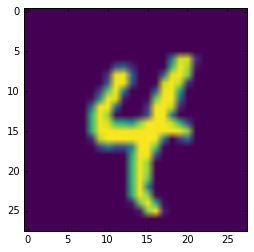

In [79]:
#dummy mini_batch
mini_batch = mini_batches[0]
x = mini_batch[0][0]
y = mini_batch[0][1]
plt.imshow(np.reshape(x,(28,28)))
print(np.argmax(y))

In [82]:
#moving forward to the first couple lines of the backprop code. We know what is going in now
#first we define nabla_b and nabla_w place holders in the same shape as the biases and weights
#hen we use the feedforward and define activations as a list holding all the inputs
#activations are pretty much the outputs from every neuron from each layer. The activations list, will store all
#the possible activations, layer by layer.
nabla_b = [np.zeros(b.shape) for b in net.biases]
nabla_w = [np.zeros(w.shape) for w in net.weights]
# feedforward
activation = x
activations = [x] # list to store all the activations, layer by layer
zs = [] # list to store all the z vectors, layer by layer
for b, w in zip(net.biases, net.weights):
    z = np.dot(w, activation)+b
    zs.append(z)
    activation = sigmoid(z) 
#here they redefine activation as the sigmoid of the
#activation and add it to activations list
    activations.append(activation)
# backward pass
delta = net.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
nabla_b[-1] = delta
nabla_w[-1] = np.dot(delta, activations[-2].transpose())

In [90]:
activations[-1]

array([[  4.13593371e-07],
       [  1.39324812e-06],
       [  2.16565153e-06],
       [  5.15945343e-04],
       [  9.99610907e-01],
       [  7.46267503e-04],
       [  2.80514416e-05],
       [  2.32254137e-03],
       [  4.81384999e-03],
       [  1.80902507e-04]])

Because the cost function is just a quadratic equation, we already have the analytical solution to the derivative which is equation 1:
$$\partial(C) = \partial(\frac{1}{2}\sum_j(y_j-a_j)^2)$$
$$\partial C/\partial a_j^L = (a_j -y_j)$$
and then multiply against the derivative of the sigmoid
$$\delta^L_j = \frac{\partial C}{\partial a^L_j}\sigma' (z^L_j)$$

In [91]:
#output_activations-y
print(net.cost_derivative(activations[-1],y)==activations[-1]-y)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [92]:
delta = net.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])

In [93]:
delta

array([[  1.71059406e-13],
       [  1.94113762e-12],
       [  4.69003640e-12],
       [  2.66062253e-07],
       [ -1.51334819e-07],
       [  5.56499579e-07],
       [  7.86861301e-10],
       [  5.38167015e-06],
       [  2.30615996e-05],
       [  3.27197968e-08]])

Here's equation 2
$$\delta^l = ((w^{l+1})^T\delta^{l+1}\odot \sigma'(z^l)$$